<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%93%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Градиенты

# Gradients

В этом уроке мы научимся находить градиенты по разным осям

In this lesson we will learn how to find gradients on different axes


Если говорить формально, то градиент изображения определяется как направленное изменение интенсивности изображения.


Проще говоря, в каждом пикселе входного изображения градиент измеряет изменение интенсивности пикселя в определенном направлении. Оценивая направление вместе с величиной, мы можем обнаружить области изображения, похожие на края.


Formally speaking, an image gradient is defined as a directional change in image intensity.


Simply put, in each pixel of the input image, the gradient measures the change in pixel intensity in a certain direction. By evaluating the direction along with the magnitude, we can detect areas of the image that look like edges.





Они используются в качестве основных строительных блоков во многих алгоритмах  компьютерного зрения. 

Однако основное применение градиентов изображения лежит в области обнаружения краев.

They are used as basic building blocks in many computer vision algorithms. 

However, the main application of image gradients lies in the area of edge detection.

> **Обнаружение краев** - это процесс поиска краев на изображении, который раскрывает структурную информацию об объектах







> **Edge detection** is the process of finding edges in an image, which reveals structural information about objects

In [1]:
!wget http://dataudt.ru/datasets/cv/Lesson_21.Gradients.zip
!unzip Lesson_21.Gradients.zip
%cd /content/Lesson_21.Gradients

--2022-02-01 18:47:18--  http://dataudt.ru/datasets/cv/Lesson_21.Gradients.zip
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2026673 (1.9M) [application/zip]
Saving to: ‘Lesson_21.Gradients.zip’

Lesson_21.Gradients 100%[===================>]   1.93M  2.24MB/s    in 0.9s    

2022-02-01 18:47:19 (2.24 MB/s) - ‘Lesson_21.Gradients.zip’ saved [2026673/2026673]

Archive:  Lesson_21.Gradients.zip
  inflating: Lesson_21.Gradients/brick_01.png  
  inflating: Lesson_21.Gradients/brick_02.png  
  inflating: Lesson_21.Gradients/brick_03.png  
  inflating: Lesson_21.Gradients/Gradients.py  
/content/Lesson_21.Gradients


In [2]:
# импортируем необходимые модули
# import the necessary packages
import cv2
from google.colab.patches import cv2_imshow

In [3]:
#  создадим отдельный словарь с аргументами 
# create a separate dictionary with arguments
args = {
  # путь к входному изображению 
  # path to input image
  "image" : "brick_02.png" 
}

Original


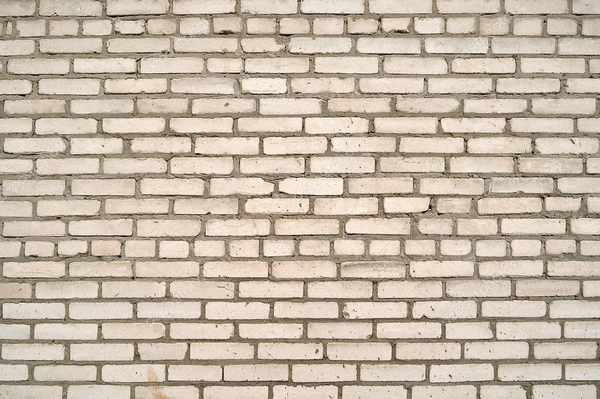

In [4]:
# загрузим изображение, преобразуем его в оттенки серого 
# и отобразим исходное изображение
# load the image, convert it to grayscale, and display the original
# image
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print('Original')
cv2_imshow(image)

Sobel X


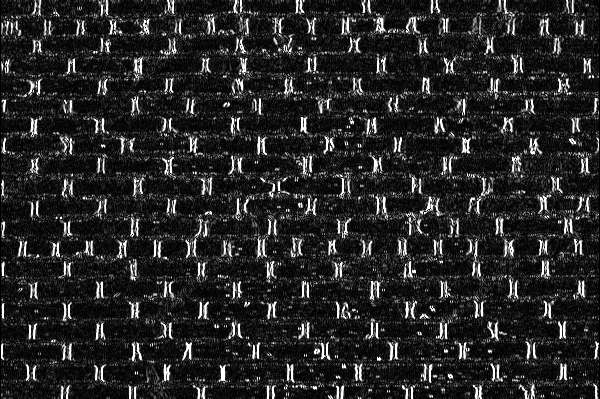

Sobel Y


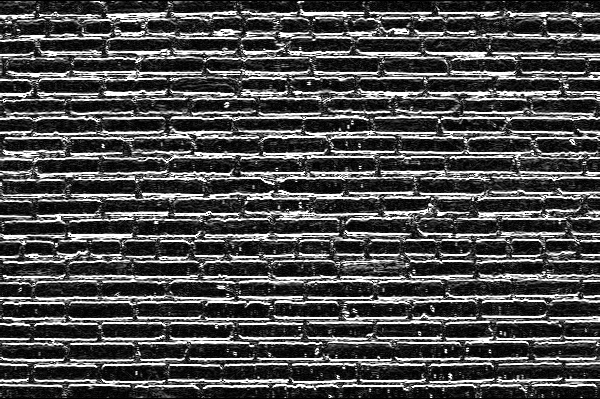

Sobel Combined


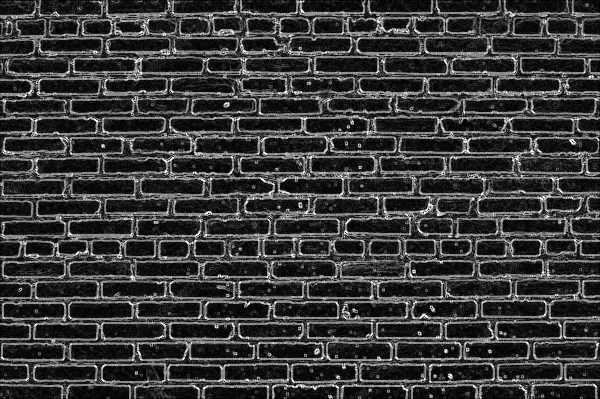

In [5]:
# вычисляем градиенты по осям X и Y соответственно
# compute gradients along the X and Y axis, respectively
gX = cv2.Sobel(gray, ddepth=cv2.CV_64F, dx=1, dy=0)
gY = cv2.Sobel(gray, ddepth=cv2.CV_64F, dx=0, dy=1)

# изображения `gX` и` gY` теперь относятся к типу 
# данных с плавающей запятой, поэтому нам нужно 
# позаботиться о том, чтобы преобразовать их обратно
# в беззнаковое 8-битное целочисленное представление,
# чтобы другие функции OpenCV могли их использовать
# the `gX` and `gY` images are now of the floating point data type,
# so we need to take care to convert them back a to unsigned 8-bit
# integer representation so other OpenCV functions can utilize them
gX = cv2.convertScaleAbs(gX)
gY = cv2.convertScaleAbs(gY)

# объединить sobel X и Y представления в одно изображение
# combine the sobel X and Y representations into a single image
sobelCombined = cv2.addWeighted(gX, 0.5, gY, 0.5, 0)

# выведем на экран наши выходные изображения
# show our output images
print("Sobel X") 
cv2_imshow(gX)

print("Sobel Y") 
cv2_imshow(gY)

print("Sobel Combined") 
cv2_imshow(sobelCombined)